# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv', nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in resources data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resources data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# 1.2 Data Analysis

Number of projects thar are approved for funding  42286 , ( 84.572 %)
Number of projects thar are not approved for funding  7714 , ( 15.428 %)


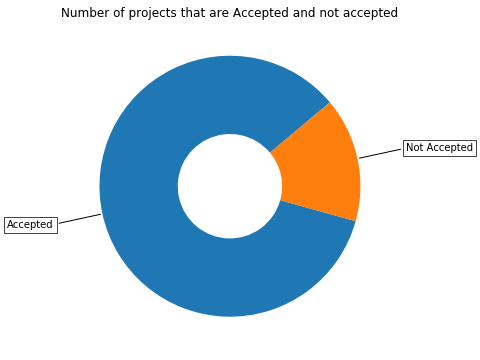

In [5]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.6), startangle=40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number of projects that are Accepted and not accepted")

plt.show()

### 1.2.1 Univariate Analysis: School State

In [6]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
#print(temp.head())
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

'''# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')
'''

'# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = go.Figure(data=dat

In [7]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
26         MT       0.764151
46         VT       0.781250
7          DC       0.785425
43         TX       0.803916
13         ID       0.804636
States with highest % approvals
   state_code  num_proposals
35         OH       0.877966
30         NH       0.879433
6          CT       0.882429
47         WA       0.888486
28         ND       0.904762


In [8]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [9]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

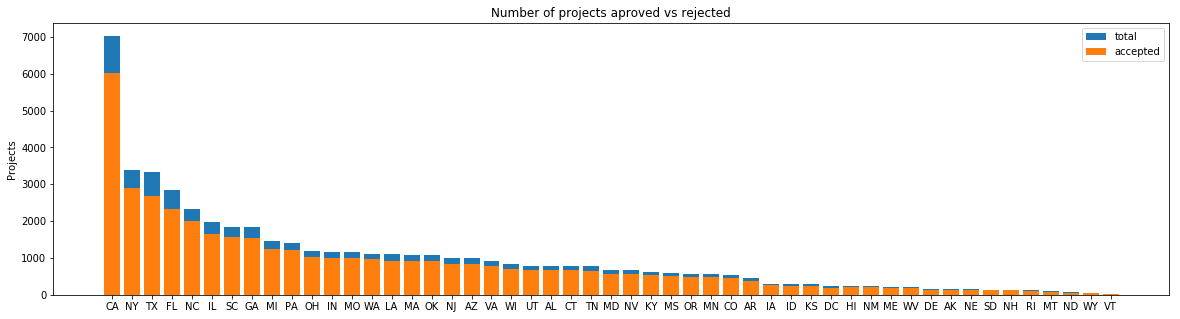

   school_state  project_is_approved  total       Avg
4            CA                 6013   7024  0.856065
34           NY                 2903   3393  0.855585
43           TX                 2669   3320  0.803916
9            FL                 2328   2839  0.820007
27           NC                 2006   2340  0.857265
   school_state  project_is_approved  total       Avg
39           RI                  107    126  0.849206
26           MT                   81    106  0.764151
28           ND                   57     63  0.904762
50           WY                   42     51  0.823529
46           VT                   25     32  0.781250


In [10]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__

### 1.2.2 Univariate Analysis: teacher_prefix

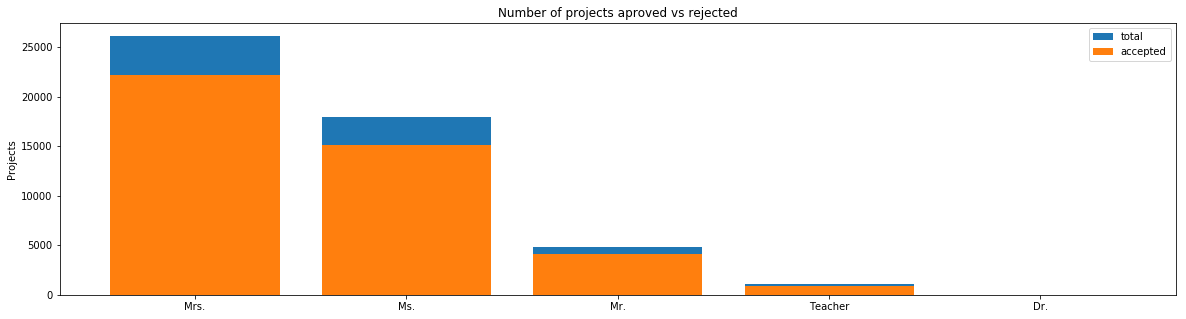

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                22239  26140  0.850765
3            Ms.                15124  17936  0.843220
1            Mr.                 4073   4859  0.838238
4        Teacher                  847   1061  0.798303
0            Dr.                    1      2  0.500000
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                22239  26140  0.850765
3            Ms.                15124  17936  0.843220
1            Mr.                 4073   4859  0.838238
4        Teacher                  847   1061  0.798303
0            Dr.                    1      2  0.500000


In [11]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### 1.2.3 Univariate Analysis: project_grade_category

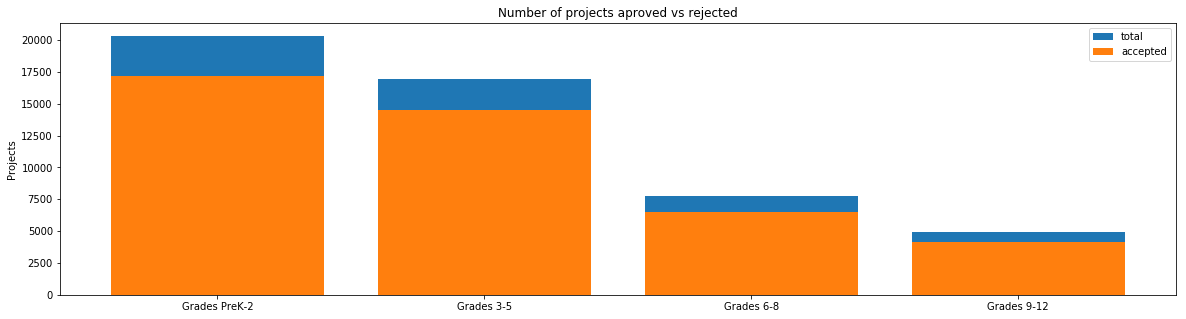

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                17185  20316  0.845885
0             Grades 3-5                14466  16968  0.852546
1             Grades 6-8                 6503   7750  0.839097
2            Grades 9-12                 4132   4966  0.832058
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                17185  20316  0.845885
0             Grades 3-5                14466  16968  0.852546
1             Grades 6-8                 6503   7750  0.839097
2            Grades 9-12                 4132   4966  0.832058


In [12]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### 1.2.4 Univariate Analysis: project_subject_categories

In [13]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [14]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

      project_subject_subcategories  \
0                     ESL, Literacy   
1  Civics & Government, Team Sports   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories  
0             Literacy_Language  
1  History_Civics Health_Sports

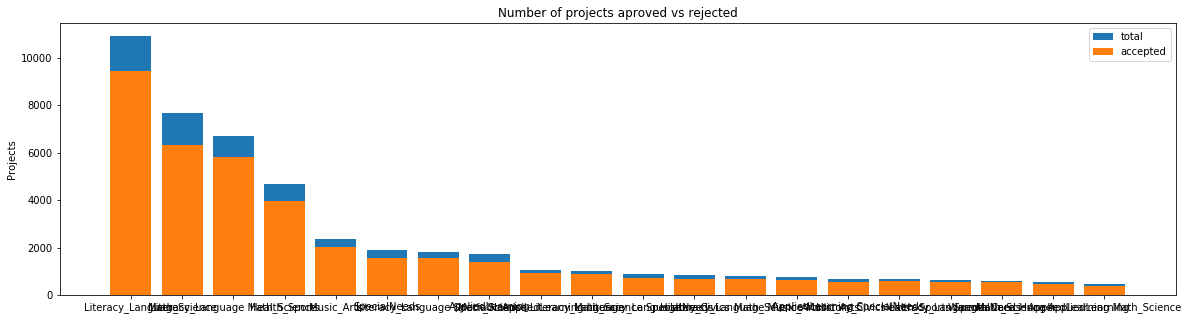

                  clean_categories  project_is_approved  total       Avg
23               Literacy_Language                 9444  10927  0.864281
31                    Math_Science                 6307   7695  0.819623
27  Literacy_Language Math_Science                 5805   6705  0.865772
8                    Health_Sports                 3976   4700  0.845957
39                      Music_Arts                 2021   2358  0.857082
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                  595    651  0.913978
14        Health_Sports SpecialNeeds                  547    633  0.864139
49                Warmth Care_Hunger                  561    606  0.925743
32      Math_Science AppliedLearning                  474    565  0.838938
4       AppliedLearning Math_Science                  386    477  0.809224


In [15]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [16]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

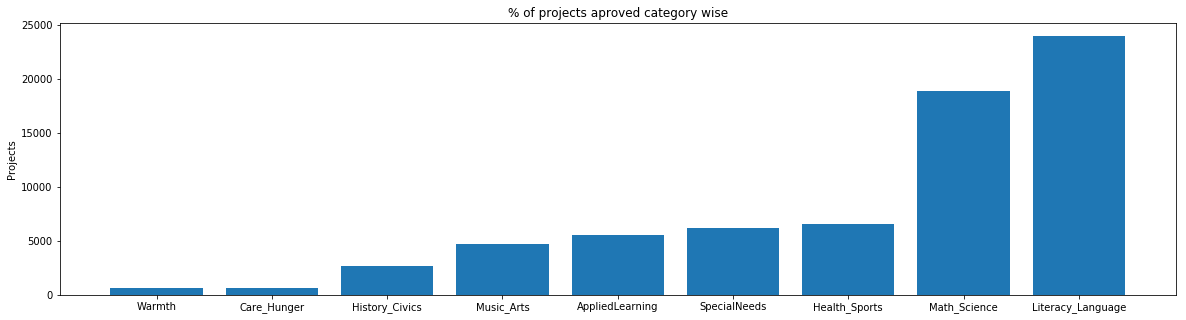

In [17]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [18]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :       643
Care_Hunger          :       643
History_Civics       :      2689
Music_Arts           :      4699
AppliedLearning      :      5569
SpecialNeeds         :      6233
Health_Sports        :      6538
Math_Science         :     18874
Literacy_Language    :     23998


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [19]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [20]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  
0             Literacy_Language                  ESL Literacy  
1  History_Civics Health_Sports  Civics_Government TeamSports

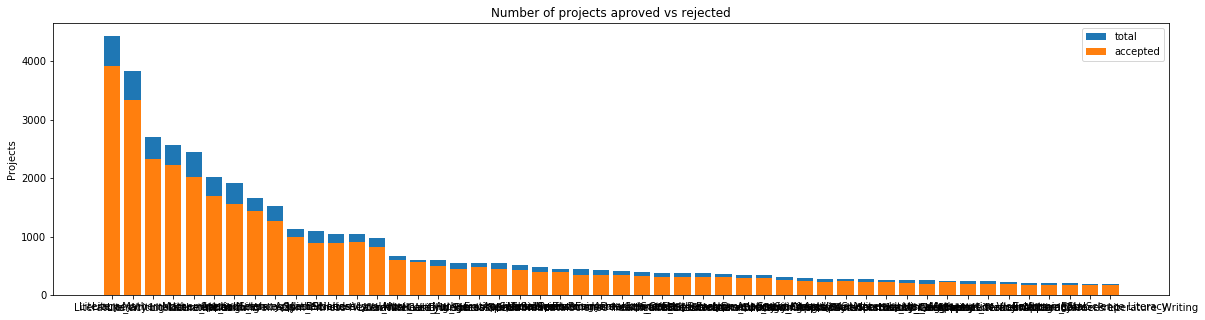

                clean_subcategories  project_is_approved  total       Avg
303                        Literacy                 3919   4434  0.883852
305            Literacy Mathematics                 3336   3833  0.870337
317  Literature_Writing Mathematics                 2331   2705  0.861738
304     Literacy Literature_Writing                 2217   2570  0.862646
327                     Mathematics                 2013   2441  0.824662
                    clean_subcategories  project_is_approved  total       Avg
3    AppliedSciences College_CareerPrep                  169    201  0.840796
367                      PerformingArts                  177    200  0.885000
125                                 ESL                  171    199  0.859296
188       EnvironmentalScience Literacy                  169    195  0.866667
17   AppliedSciences Literature_Writing                  165    188  0.877660


In [21]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [22]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

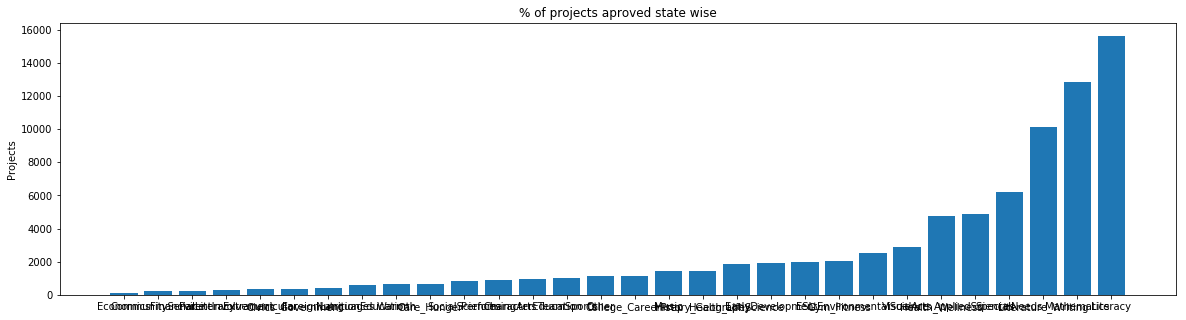

In [23]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [24]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       127
CommunityService     :       214
FinancialLiteracy    :       253
ParentInvolvement    :       302
Extracurricular      :       373
Civics_Government    :       380
ForeignLanguages     :       388
NutritionEducation   :       617
Warmth               :       643
Care_Hunger          :       643
SocialSciences       :       864
PerformingArts       :       910
CharacterEducation   :       958
TeamSports           :       995
Other                :      1128
College_CareerPrep   :      1168
Music                :      1432
History_Geography    :      1433
Health_LifeScience   :      1876
EarlyDevelopment     :      1937
ESL                  :      1999
Gym_Fitness          :      2068
EnvironmentalScience :      2533
VisualArts           :      2865
Health_Wellness      :      4732
AppliedSciences      :      4901
SpecialNeeds         :      6233
Literature_Writing   :     10127
Mathematics          :     12832
Literacy             :     15611


### 1.2.6 Univariate Analysis: Text features (Title)

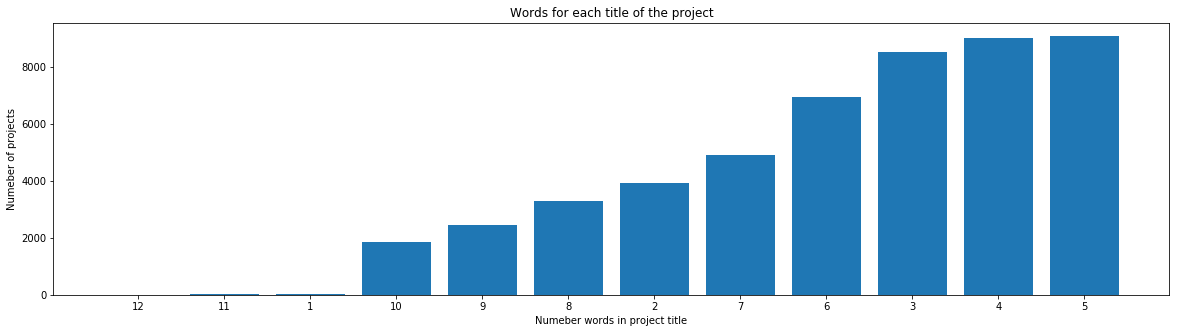

In [25]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [26]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

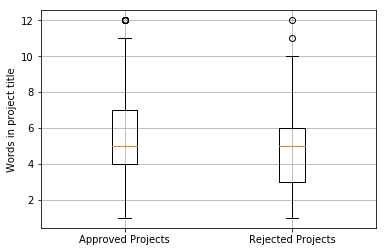

In [27]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

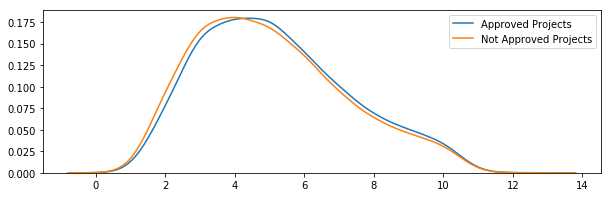

In [28]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [29]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [30]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

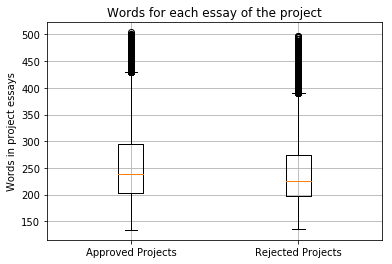

In [31]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

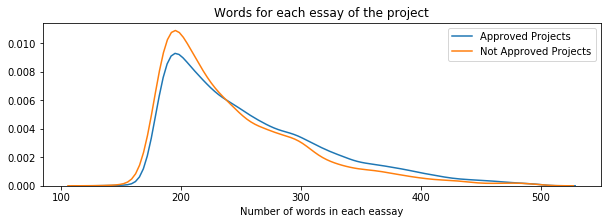

In [32]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [33]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [34]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [35]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [36]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

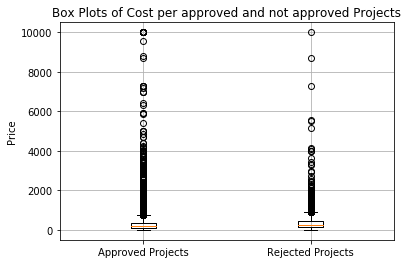

In [37]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

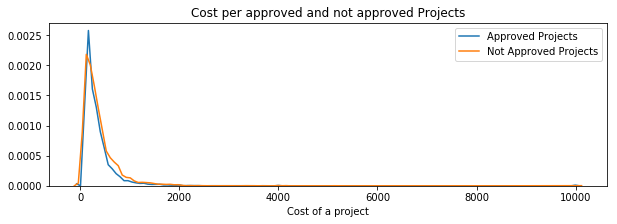

In [38]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [39]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.772      |         41.429        |
|     10     |       33.99       |         73.18         |
|     15     |       58.57       |         98.548        |
|     20     |       78.64       |        118.006        |
|     25     |       99.99       |        140.785        |
|     30     |      117.035      |        161.972        |
|     35     |       137.08      |        183.825        |
|     40     |       157.0       |        208.726        |
|     45     |      177.802      |        234.921        |
|     50     |      198.085      |        261.255        |
|     55     |      221.808      |        292.798        |
|     60     |       254.0       |        322.998        |
|     65     |      283.812      |        359.934       

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

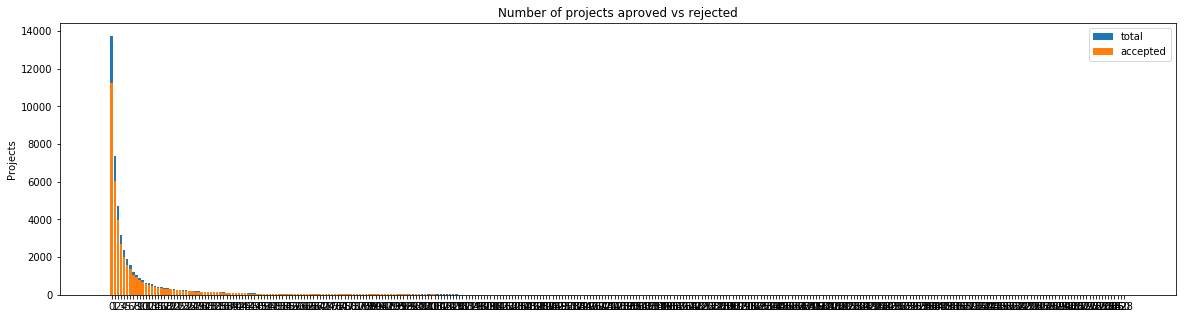

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                11260  13735   
1                                             1                 6055   7352   
2                                             2                 3944   4709   
3                                             3                 2690   3199   
4                                             4                 2032   2399   

        Avg  
0  0.819803  
1  0.823585  
2  0.837545  
3  0.840888  
4  0.847020  
     teacher_number_of_previously_posted_projects  project_is_approved  total  \
250                                           266                    1      1   
249                                           265                    1      1   
247                                           262                    1      1   
245                                           260                    1      1   
326                                 

In [40]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved' , top=False)

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

In [41]:
project_data.columns.values
project_data.shape

(50000, 20)

In [42]:
res_sum_num=project_data[project_data['project_resource_summary'].str.match('.*[0-9*].*')]#https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/

In [43]:
res_sum_num.shape

(7083, 20)

In [44]:
def univariate_barplots_res_sum_num(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(res_sum_num.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(res_sum_num.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(res_sum_num.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

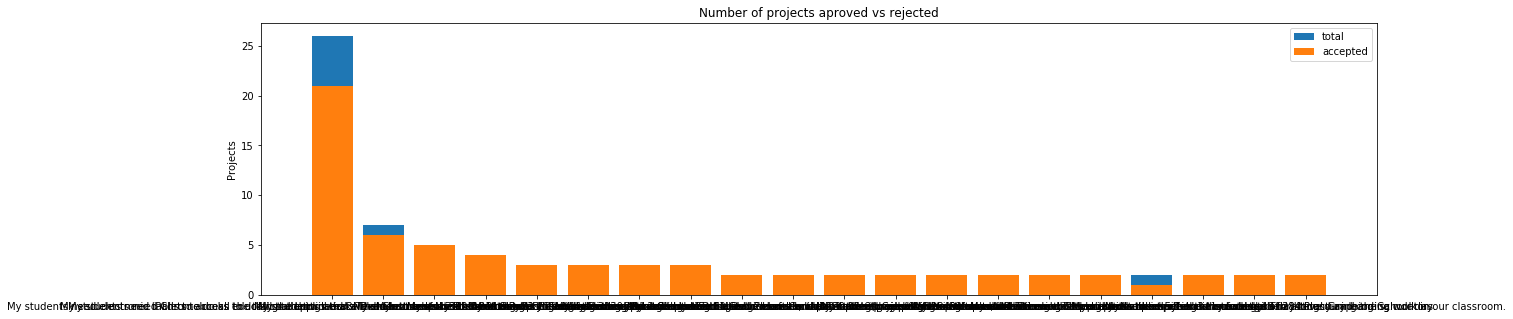

                               project_resource_summary  project_is_approved  \
5580  My students need electronic tablets to do all ...                   21   
3785  My students need Chromebooks to do all the thi...                    6   
1650  My students need 3 Texas Instruments TI - 84 P...                    5   
4354  My students need a Dell Chromebook 3120 and Go...                    4   
5813  My students need iPads to access educational a...                    3   

      total       Avg  
5580     26  0.807692  
3785      7  0.857143  
1650      5  1.000000  
4354      4  1.000000  
5813      3  1.000000  
                               project_resource_summary  project_is_approved  \
2360  My students need 4 Samsung Chromebooks to rese...                    2   
3807  My students need Chromebooks to prepare and en...                    1   
3485  My students need 7 Hokki stools to help them s...                    2   
2912  My students need 5 Texas Instruments TI - 84 P...

In [45]:
univariate_barplots_res_sum_num(res_sum_num, 'project_resource_summary', 'project_is_approved', top=20)

In [46]:
res_sum_without_num=project_data[project_data['project_resource_summary'].str.contains('.*[0-9].*')==False]#https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/

In [47]:
res_sum_without_num.shape

(42918, 20)

In [48]:
def univariate_barplots_res_sum_without_num(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(res_sum_without_num.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(res_sum_without_num.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(res_sum_without_num.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

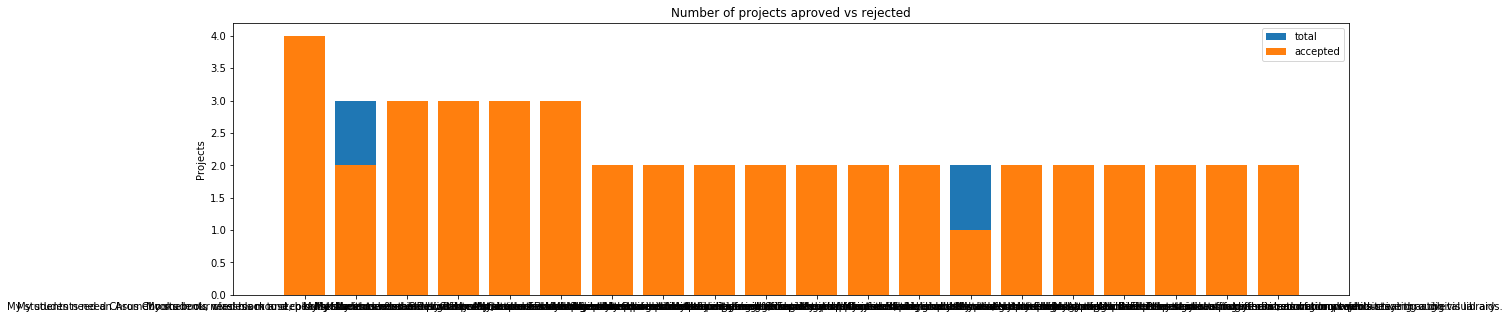

                                project_resource_summary  project_is_approved  \
16102  My students need black and color ink for our c...                    4   
13064  My students need an Asus Chromebook, wireless ...                    2   
668    My students need Chromebooks in our classroom ...                    3   
10639  My students need a variety of books for our cl...                    3   
4327   My students need a Dell Chromebook and EDU Man...                    3   

       total       Avg  
16102      4  1.000000  
13064      3  0.666667  
668        3  1.000000  
10639      3  1.000000  
4327       3  1.000000  
                                project_resource_summary  project_is_approved  \
22933  My students need graphic novels to spark their...                    2   
3515   My students need Sphero robotic balls, Nubby C...                    2   
12994  My students need an Apple MacBook Pro to conne...                    2   
25164  My students need iPads to maximi

In [49]:
univariate_barplots_res_sum_without_num(res_sum_without_num, 'project_resource_summary', 'project_is_approved', top=20)

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [50]:
project_data.head(2)


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price  quantity  
0  My students are English learners that are work...  154.6        23  
1  Our students arrive to our school eager to lea...  299.0         1

In [51]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[5000])
print("="*50)
print(project_data['essay'].values[5999])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [52]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [53]:
sent = decontracted(project_data['essay'].values[1000])
print(sent)
print("="*50)

How do you remember your days of school? Was it in a sterile environment with plain walls, rows of desks, and a teacher in front of the room? A typical day in our room is nothing like that. I work hard to create a warm inviting themed room for my students look forward to coming to each day.\r\n\r\nMy class is made up of 28 wonderfully unique boys and girls of mixed races in Arkansas.\r\nThey attend a Title I school, which means there is a high enough percentage of free and reduced-price lunch to qualify. Our school is an \"open classroom\" concept, which is very unique as there are no walls separating the classrooms. These 9 and 10 year-old students are very eager learners; they are like sponges, absorbing all the information and experiences and keep on wanting more.With these resources such as the comfy red throw pillows and the whimsical nautical hanging decor and the blue fish nets, I will be able to help create the mood in our classroom setting to be one of a themed nautical enviro

In [54]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

How do you remember your days of school? Was it in a sterile environment with plain walls, rows of desks, and a teacher in front of the room? A typical day in our room is nothing like that. I work hard to create a warm inviting themed room for my students look forward to coming to each day.    My class is made up of 28 wonderfully unique boys and girls of mixed races in Arkansas.  They attend a Title I school, which means there is a high enough percentage of free and reduced-price lunch to qualify. Our school is an  open classroom  concept, which is very unique as there are no walls separating the classrooms. These 9 and 10 year-old students are very eager learners; they are like sponges, absorbing all the information and experiences and keep on wanting more.With these resources such as the comfy red throw pillows and the whimsical nautical hanging decor and the blue fish nets, I will be able to help create the mood in our classroom setting to be one of a themed nautical environment. C

In [55]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

How do you remember your days of school Was it in a sterile environment with plain walls rows of desks and a teacher in front of the room A typical day in our room is nothing like that I work hard to create a warm inviting themed room for my students look forward to coming to each day My class is made up of 28 wonderfully unique boys and girls of mixed races in Arkansas They attend a Title I school which means there is a high enough percentage of free and reduced price lunch to qualify Our school is an open classroom concept which is very unique as there are no walls separating the classrooms These 9 and 10 year old students are very eager learners they are like sponges absorbing all the information and experiences and keep on wanting more With these resources such as the comfy red throw pillows and the whimsical nautical hanging decor and the blue fish nets I will be able to help create the mood in our classroom setting to be one of a themed nautical environment Creating a classroom e

In [56]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [57]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:55<00:00, 893.82it/s]


In [58]:
project_data['preprocessed_essays'] = preprocessed_essays

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [59]:
# printing some random essays.
print(project_data['project_title'].values[7])
print("="*50)
print(project_data['project_title'].values[5])
print("="*50)

It's the 21st Century
Flexible Seating for Mrs. Jarvis' Terrific Third Graders!!


In [60]:
sent_title = decontracted(project_data['project_title'].values[7])
print(sent_title)
print("="*50)
sent_title1 = decontracted(project_data['project_title'].values[9])
print(sent_title1)

It is the 21st Century
Just For the Love of Reading--\r\nPure Pleasure


In [61]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent_title1 = sent_title1.replace('\\r', ' ')
sent_title1 = sent_title1.replace('\\"', ' ')
sent_title1 = sent_title1.replace('\\n', ' ')
print(sent_title1)

Just For the Love of Reading--  Pure Pleasure


In [62]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent_title1 = re.sub('[^A-Za-z0-9]+', ' ', sent_title1)
print(sent_title1)

Just For the Love of Reading Pure Pleasure


In [63]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent_title = decontracted(sentance)
    sent_title = sent_title.replace('\\r', ' ')
    sent_title = sent_title.replace('\\"', ' ')
    sent_title = sent_title.replace('\\n', ' ')
    sent_title = re.sub('[^A-Za-z0-9]+', ' ', sent_title)
    # https://gist.github.com/sebleier/554280
    sent_title = ' '.join(e for e in sent_title.split() if e not in stopwords)
    preprocessed_project_title.append(sent_title.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 22451.28it/s]


In [64]:
# after preprocesing
print(preprocessed_project_title[5])
print(preprocessed_project_title[7])

flexible seating mrs jarvis terrific third graders
it 21st century


In [65]:
title = list(project_data['project_title'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
title_list = []
for i in title:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    title_list.append(temp.strip())

In [66]:
project_data['preprocessed_project_title'] = title_list
#project_data.drop(['project_title'], axis=1, inplace=True)
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2  ...  \
0  \"The limits of your language are the limits o...  ...   
1  The projector we need for our school is very c...  ...   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   

  teacher_number_of_previously_posted_projects project_is_approved  \
0                                            0                   0   
1                                            7                   1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  price quantity  \
0  My students are English learners that are work...  154.6       23   
1  Our students arrive to our school eager to lea...  299.0        1   

                                 preprocessed_essays  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   

                   preprocessed_project_title  
0  EducationalSupportforEnglishLearnersatHome  
1           Wanted:ProjectorforHungryLearners  

[2 rows x 22 columns]

## 1. 4 Preparing data for models

In [67]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'preprocessed_essays', 'preprocessed_project_title'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [68]:
list(project_data.columns.values)

['Unnamed: 0',
 'id',
 'teacher_id',
 'teacher_prefix',
 'school_state',
 'project_submitted_datetime',
 'project_grade_category',
 'project_title',
 'project_essay_1',
 'project_essay_2',
 'project_essay_3',
 'project_essay_4',
 'project_resource_summary',
 'teacher_number_of_previously_posted_projects',
 'project_is_approved',
 'clean_categories',
 'clean_subcategories',
 'essay',
 'price',
 'quantity',
 'preprocessed_essays',
 'preprocessed_project_title']

In [69]:
project_data['teacher_prefix'].values

array(['Mrs.', 'Mr.', 'Ms.', ..., 'Mrs.', 'Mrs.', 'Mrs.'], dtype=object)

In [70]:
project_data['school_state'].values

array(['IN', 'FL', 'AZ', ..., 'SD', 'CT', 'KY'], dtype=object)

In [71]:
project_data['project_grade_category'].values

array(['Grades PreK-2', 'Grades 6-8', 'Grades 6-8', ..., 'Grades 3-5',
       'Grades PreK-2', 'Grades PreK-2'], dtype=object)

In [72]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (50000, 9)


In [73]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (50000, 30)


In [74]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

In [75]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


states_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",states_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'NE', 'AK', 'DE', 'WV', 'ME', 'NM', 'HI', 'DC', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'CT', 'TN', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'MA', 'LA', 'WA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matrix after one hot encodig  (50000, 51)


In [76]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    #print(word)
    my_counter.update(word.split('  '))
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grades_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grades_dict.items(), key=lambda kv: kv[1]))

In [77]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())


grades_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",grades_one_hot.shape)

['Grades 9-12', 'Grades 6-8', 'Grades 3-5', 'Grades PreK-2']
Shape of matrix after one hot encodig  (50000, 4)


In [78]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('')
for word in project_data['teacher_prefix'].values:
    #print(word)
    my_counter.update(word.split())
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacherprefix_dict = dict(my_counter)
sorted_teacherprefix_dict = dict(sorted(teacherprefix_dict.items(), key=lambda kv: kv[1]))

In [79]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_teacherprefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())


teacherprefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values)
print("Shape of matrix after one hot encodig ",teacherprefix_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (50000, 5)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [80]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (50000, 12211)


In [81]:
type(text_bow)

scipy.sparse.csr.csr_matrix

<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [82]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (50000, 2135)


In [83]:
type(title_bow)

scipy.sparse.csr.csr_matrix

#### 1.4.2.3 TFIDF vectorizer

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (50000, 12211)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_project_title)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (50000, 2135)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [86]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [87]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [88]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))
#print(avg_w2v_vectors[0])

100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [00:28<00:00, 1745.18it/s]


50000
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [89]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title.append(vector)

print(len(avg_w2v_title))
print(len(avg_w2v_title[0]))
#print(avg_w2v_title[0])

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 44238.11it/s]


50000
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [90]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [91]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [03:40<00:00, 226.61it/s]


50000
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [92]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model1 = TfidfVectorizer()
tfidf_model1.fit(preprocessed_project_title)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model1.get_feature_names(), list(tfidf_model1.idf_)))
tfidf_title = set(tfidf_model1.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_w2v_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title.append(vector)

print(len(tfidf_w2v_title))
print(len(tfidf_w2v_title[0]))

### 1.4.3 Vectorizing Numerical features

In [93]:
# the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_normalized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_normalized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 299.33367619999996, Standard deviation : 378.20927190421384


In [94]:
price_normalized

array([[-0.38268146],
       [-0.00088225],
       [ 0.57512161],
       ...,
       [-0.65382764],
       [-0.52109689],
       [ 0.54492668]])

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [95]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_normalized.shape)

(50000, 9)
(50000, 30)
(50000, 12211)
(50000, 1)


In [96]:
# Assignment 3: Apply KNN# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_normalized))
X.shape

(50000, 12251)

# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

In [97]:
Y = project_data['project_is_approved'].values
del project_data['project_is_approved']
project_data.columns
#project_data.loc[:, project_data.columns != 'project_is_approved'].values
#X1 = np.array(preprocessed_essays)
#X2 = project_data['preprocessed_project_title'].values

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'quantity',
       'preprocessed_essays', 'preprocessed_project_title'],
      dtype='object')

In [98]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(project_data, Y, test_size=0.33) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) # this is random splitting


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(22445, 21) (22445,)
(11055, 21) (11055,)
(16500, 21) (16500,)


In [99]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)

X_train_categories_one_hot = vectorizer.transform(X_train['clean_categories'].values)
X_cv_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)

In [100]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_sub_categories_one_hot = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_sub_categories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_categories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)

In [101]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)

X_train_states_one_hot = vectorizer.transform(X_train['school_state'].values)
X_cv_states_one_hot = vectorizer.transform(X_cv['school_state'].values)
X_test_states_one_hot = vectorizer.transform(X_test['school_state'].values)

In [102]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)

X_train_grades_one_hot = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grades_one_hot = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grades_one_hot = vectorizer.transform(X_test['project_grade_category'].values)

In [103]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_teacherprefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values)

X_train_teacherprefix_one_hot = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacherprefix_one_hot = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacherprefix_one_hot = vectorizer.transform(X_test['teacher_prefix'].values)

In [104]:
# the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
X_train_price_normalized = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
X_cv_price_normalized = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
X_test_price_normalized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

Essay Pre-processing

In [105]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_essays'])
# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'])
X_cv_essay_bow = vectorizer.transform(X_cv['preprocessed_essays'])
X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'])

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_essays'])
X_train_essay_tfid = vectorizer.transform(X_train['preprocessed_essays'])
X_cv_essay_tfid= vectorizer.transform(X_cv['preprocessed_essays'])
X_test_essay_tfid = vectorizer.transform(X_test['preprocessed_essays'])

In [107]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [108]:
# average Word2Vec
# compute average word2vec for each review.
X_train_essay_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_essay_avg_w2v_vectors.append(vector)

X_cv_essay_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_essay_avg_w2v_vectors.append(vector)
    
X_test_essay_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_essay_avg_w2v_vectors.append(vector)

100%|██████████████████████████████████████████████████████████████████████████| 16500/16500 [00:08<00:00, 1947.49it/s]


In [109]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [110]:
# average Word2Vec
# compute average word2vec for each review.
X_train_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_essay_tfidf_w2v_vectors.append(vector)

X_cv_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_essay_tfidf_w2v_vectors.append(vector)
    
X_test_essay_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_essay_tfidf_w2v_vectors.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 16500/16500 [01:14<00:00, 232.32it/s]


Text Pre-processing

In [111]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_project_title'])
# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train['preprocessed_project_title'])
X_cv_title_bow = vectorizer.transform(X_cv['preprocessed_project_title'])
X_test_title_bow = vectorizer.transform(X_test['preprocessed_project_title'])

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_project_title'])
X_train_title_tfid = vectorizer.transform(X_train['preprocessed_project_title'])
X_cv_title_tfid= vectorizer.transform(X_cv['preprocessed_project_title'])
X_test_title_tfid = vectorizer.transform(X_test['preprocessed_project_title'])

In [113]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [114]:
# average Word2Vec
# compute average word2vec for each review.
X_train_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_title_avg_w2v_vectors.append(vector)

X_cv_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_cv_title_avg_w2v_vectors.append(vector)
    
X_test_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_title_avg_w2v_vectors.append(vector)

100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 213213.85it/s]


In [115]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [116]:
# average Word2Vec
# compute average word2vec for each review.
X_train_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_title_tfidf_w2v_vectors.append(vector)

X_cv_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_cv_title_tfidf_w2v_vectors.append(vector)
    
X_test_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_title_tfidf_w2v_vectors.append(vector)

100%|████████████████████████████████████████████████████████████████████████| 16500/16500 [00:00<00:00, 239448.13it/s]


### 2.4.1 Applying KNN brute force on BOW,<font color='red'> SET 1</font>

## 1.1 Method 1: Simple for loop

In [117]:
X_train_bow=hstack((X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_states_one_hot,X_train_grades_one_hot,X_train_teacherprefix_one_hot,X_train_price_normalized,X_train_essay_bow,X_train_title_bow)).tocsr()

X_cv_bow=hstack((X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_states_one_hot,X_cv_grades_one_hot,X_cv_teacherprefix_one_hot,X_cv_price_normalized,X_cv_essay_bow,X_cv_title_bow)).tocsr()

X_test_bow=hstack((X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_states_one_hot,X_test_grades_one_hot,X_test_teacherprefix_one_hot,X_test_price_normalized,X_test_essay_bow,X_test_title_bow)).tocsr()

In [118]:
X_train_bow

<22445x9081 sparse matrix of type '<class 'numpy.float64'>'
	with 2486483 stored elements in Compressed Sparse Row format>

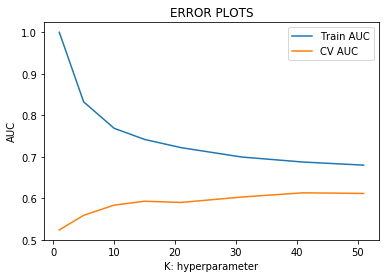

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_bow, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    #y_train_pred =  neigh.predict_proba(X_train_bow)[:,1]
    y_train_pred = []
    for i in range(0, X_train_bow.shape[0], 1000):
        y_train_pred.extend(neigh.predict_proba(X_train_bow[i:i+1000])[:,1])
    #y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
    y_cv_pred = []
    for i in range(0, X_cv_bow.shape[0], 1000):
        y_cv_pred.extend(neigh.predict_proba(X_cv_bow[i:i+1000])[:,1])
       
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

## 1.2 Method 2: GridSearch or randomsearch

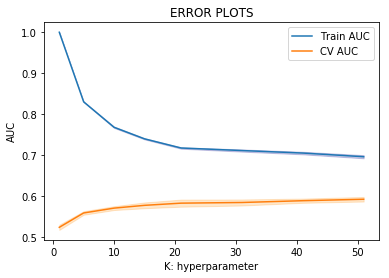

In [120]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 23, 26, 31]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_bow, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [121]:
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.best_params_)

0.5920381740370688
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')
{'n_neighbors': 31}


In [122]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less
# Note: based on the method you use you might get different hyperparameter values as best one
# so, you choose according to the method you choose, you use gridsearch if you are having more computing power and note it will take more time
# if you increase the cv values in the GridSearchCV you will get more rebust results.

#here we are choosing the best_k based on forloop results
best_k = clf.best_params_['n_neighbors']

# 2. Testing with Test data

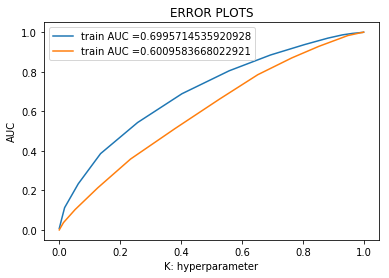

Train confusion matrix
[[    6  3379]
 [    9 19051]]
Test confusion matrix
[[    5  2600]
 [    3 13892]]


In [123]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = []
for i in range(0, X_train_bow.shape[0], 1000):
    y_train_pred.extend(neigh.predict_proba(X_train_bow[i:i+1000])[:,1])
#y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
y_test_pred = []
for i in range(0, X_test_bow.shape[0], 1000):
        y_test_pred.extend(neigh.predict_proba(X_test_bow[i:i+1000])[:,1])

#train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_train_bow)[:,1])
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
#test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,  y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, neigh.predict(X_train_bow)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test_bow)))

Train confusion matrix


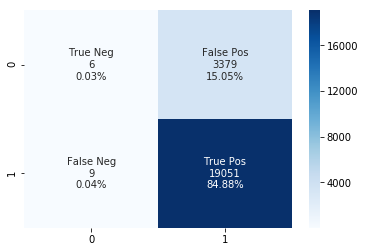

In [124]:
train_conf_matrix_BOW=confusion_matrix(y_train, neigh.predict(X_train_bow))
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                train_conf_matrix_BOW.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     train_conf_matrix_BOW.flatten()/np.sum(train_conf_matrix_BOW)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
sns.heatmap(train_conf_matrix_BOW, annot=labels, fmt='', cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Train confusion matrix');

Test confusion matrix


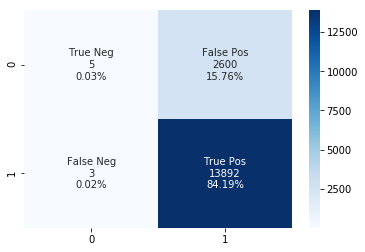

In [125]:
test_conf_matrix_BOW=confusion_matrix(y_test, neigh.predict(X_test_bow))
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                test_conf_matrix_BOW.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     test_conf_matrix_BOW.flatten()/np.sum(test_conf_matrix_BOW)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
sns.heatmap(test_conf_matrix_BOW, annot=labels, fmt='', cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Test confusion matrix');

### 2.4.2 Applying KNN brute force on TFIDF,<font color='red'> SET 2</font>

In [126]:
X_train_tfid=hstack((X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_states_one_hot,X_train_grades_one_hot,X_train_teacherprefix_one_hot,X_train_price_normalized,X_train_essay_tfid,X_train_title_tfid)).tocsr()

X_cv_tfid=hstack((X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_states_one_hot,X_cv_grades_one_hot,X_cv_teacherprefix_one_hot,X_cv_price_normalized,X_cv_essay_tfid,X_cv_title_tfid)).tocsr()

X_test_tfid=hstack((X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_states_one_hot,X_test_grades_one_hot,X_test_teacherprefix_one_hot,X_test_price_normalized,X_test_essay_tfid,X_test_title_tfid)).tocsr()

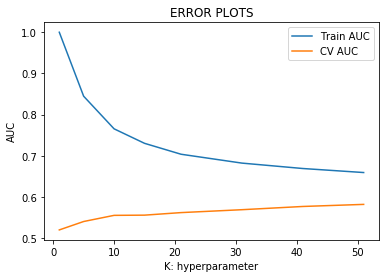

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_tfid, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    #y_train_pred =  neigh.predict_proba(X_train_bow)[:,1]
    y_train_pred = []
    for i in range(0, X_train_tfid.shape[0], 1000):
        y_train_pred.extend(neigh.predict_proba(X_train_tfid[i:i+1000])[:,1])
    #y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
    y_cv_pred = []
    for i in range(0, X_cv_tfid.shape[0], 1000):
        y_cv_pred.extend(neigh.predict_proba(X_cv_tfid[i:i+1000])[:,1])
       
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

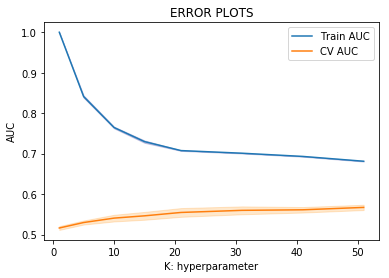

In [128]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 23, 26, 31]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_tfid, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [129]:
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.best_params_)

0.5671187975970479
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')
{'n_neighbors': 31}


In [130]:
# from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less
# Note: based on the method you use you might get different hyperparameter values as best one
# so, you choose according to the method you choose, you use gridsearch if you are having more computing power and note it will take more time
# if you increase the cv values in the GridSearchCV you will get more rebust results.

#here we are choosing the best_k based on forloop results
best_k = clf.best_params_['n_neighbors']

# 2. Testing with Test data

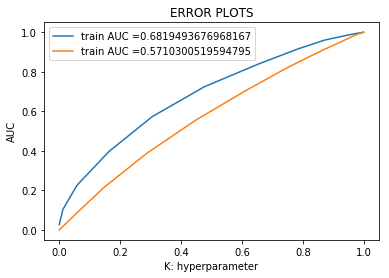

Train confusion matrix
[[    0  3385]
 [    0 19060]]
Test confusion matrix
[[    0  2605]
 [    1 13894]]


In [131]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_tfid, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = []
for i in range(0, X_train_tfid.shape[0], 1000):
    y_train_pred.extend(neigh.predict_proba(X_train_tfid[i:i+1000])[:,1])
#y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
y_test_pred = []
for i in range(0, X_test_tfid.shape[0], 1000):
        y_test_pred.extend(neigh.predict_proba(X_test_tfid[i:i+1000])[:,1])

#train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_train_bow)[:,1])
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
#test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,  y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, neigh.predict(X_train_tfid)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test_tfid)))

Train confusion matrix


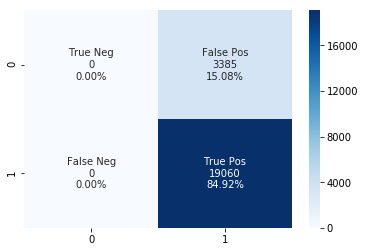

In [132]:
train_conf_matrix_tfid=confusion_matrix(y_train, neigh.predict(X_train_tfid))
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                train_conf_matrix_tfid.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     train_conf_matrix_tfid.flatten()/np.sum(train_conf_matrix_tfid)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
sns.heatmap(train_conf_matrix_tfid, annot=labels, fmt='', cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Train confusion matrix');

Test confusion matrix


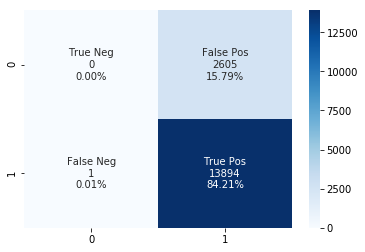

In [133]:
test_conf_matrix_tfid=confusion_matrix(y_test, neigh.predict(X_test_tfid))
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                test_conf_matrix_tfid.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     test_conf_matrix_tfid.flatten()/np.sum(test_conf_matrix_tfid)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
sns.heatmap(test_conf_matrix_tfid, annot=labels, fmt='', cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Test confusion matrix');

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>

In [134]:
X_train_avg_w2v=hstack((X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_states_one_hot,X_train_grades_one_hot,X_train_teacherprefix_one_hot,X_train_price_normalized,X_train_essay_avg_w2v_vectors,X_train_title_avg_w2v_vectors)).tocsr()

X_cv_avg_w2v=hstack((X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_states_one_hot,X_cv_grades_one_hot,X_cv_teacherprefix_one_hot,X_cv_price_normalized,X_cv_essay_avg_w2v_vectors,X_cv_title_avg_w2v_vectors)).tocsr()

X_test_avg_w2v=hstack((X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_states_one_hot,X_test_grades_one_hot,X_test_teacherprefix_one_hot,X_test_price_normalized,X_test_essay_avg_w2v_vectors,X_test_title_avg_w2v_vectors)).tocsr()

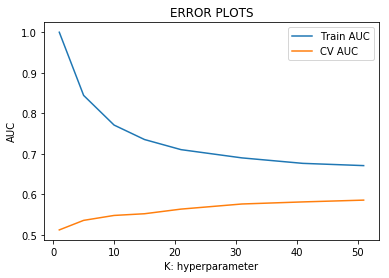

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_avg_w2v, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    #y_train_pred =  neigh.predict_proba(X_train_bow)[:,1]
    y_train_pred = []
    for i in range(0, X_train_avg_w2v.shape[0], 1000):
        y_train_pred.extend(neigh.predict_proba(X_train_avg_w2v[i:i+1000])[:,1])
    #y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
    y_cv_pred = []
    for i in range(0, X_cv_avg_w2v.shape[0], 1000):
        y_cv_pred.extend(neigh.predict_proba(X_cv_avg_w2v[i:i+1000])[:,1])
       
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

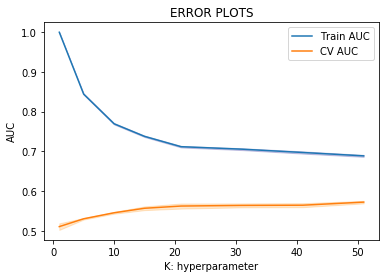

In [136]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 23, 26, 31]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_avg_w2v, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [137]:
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.best_params_)
best_k = clf.best_params_['n_neighbors']

0.5720248437125569
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')
{'n_neighbors': 31}


# 2. Testing with Test data

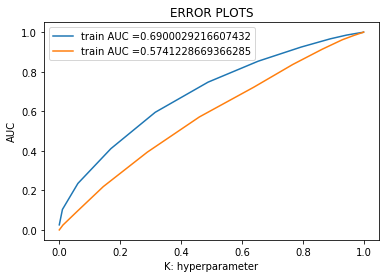

Train confusion matrix
[[    0  3385]
 [    0 19060]]
Test confusion matrix
[[    0  2605]
 [    1 13894]]


In [138]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_avg_w2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = []
for i in range(0, X_train_avg_w2v.shape[0], 1000):
    y_train_pred.extend(neigh.predict_proba(X_train_avg_w2v[i:i+1000])[:,1])
#y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
y_test_pred = []
for i in range(0, X_test_avg_w2v.shape[0], 1000):
        y_test_pred.extend(neigh.predict_proba(X_test_avg_w2v[i:i+1000])[:,1])

#train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_train_bow)[:,1])
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
#test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,  y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, neigh.predict(X_train_avg_w2v)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test_avg_w2v)))

Train confusion matrix


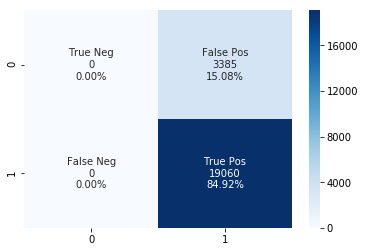

In [139]:
train_conf_matrix_avg_w2v=confusion_matrix(y_train, neigh.predict(X_train_avg_w2v))
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                train_conf_matrix_avg_w2v.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     train_conf_matrix_avg_w2v.flatten()/np.sum(train_conf_matrix_avg_w2v)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
sns.heatmap(train_conf_matrix_avg_w2v, annot=labels, fmt='', cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Train confusion matrix');

Test confusion matrix


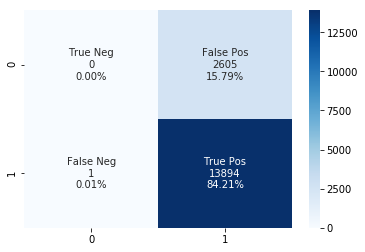

In [140]:
test_conf_matrix_avg_w2v=confusion_matrix(y_test, neigh.predict(X_test_avg_w2v))
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                test_conf_matrix_avg_w2v.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     test_conf_matrix_avg_w2v.flatten()/np.sum(test_conf_matrix_avg_w2v)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
sns.heatmap(test_conf_matrix_avg_w2v, annot=labels, fmt='', cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Test confusion matrix');

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>

In [141]:
X_train_tfidf_w2v_vectors=hstack((X_train_categories_one_hot,X_train_sub_categories_one_hot,X_train_states_one_hot,X_train_grades_one_hot,X_train_teacherprefix_one_hot,X_train_price_normalized,X_train_essay_tfidf_w2v_vectors,X_train_title_tfidf_w2v_vectors)).tocsr()

X_cv_tfidf_w2v_vectors=hstack((X_cv_categories_one_hot,X_cv_sub_categories_one_hot,X_cv_states_one_hot,X_cv_grades_one_hot,X_cv_teacherprefix_one_hot,X_cv_price_normalized,X_cv_essay_tfidf_w2v_vectors,X_cv_title_tfidf_w2v_vectors)).tocsr()

X_test_tfidf_w2v_vectors=hstack((X_test_categories_one_hot,X_test_sub_categories_one_hot,X_test_states_one_hot,X_test_grades_one_hot,X_test_teacherprefix_one_hot,X_test_price_normalized,X_test_essay_tfidf_w2v_vectors,X_test_title_tfidf_w2v_vectors)).tocsr()

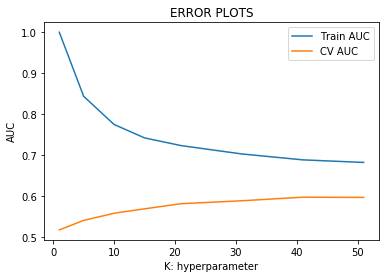

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
K = [1, 5, 10, 15, 21, 31, 41, 51]
for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_tfidf_w2v_vectors, y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    #y_train_pred =  neigh.predict_proba(X_train_bow)[:,1]
    y_train_pred = []
    for i in range(0, X_train_tfidf_w2v_vectors.shape[0], 1000):
        y_train_pred.extend(neigh.predict_proba(X_train_tfidf_w2v_vectors[i:i+1000])[:,1])
    #y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
    y_cv_pred = []
    for i in range(0, X_cv_tfidf_w2v_vectors.shape[0], 1000):
        y_cv_pred.extend(neigh.predict_proba(X_cv_tfidf_w2v_vectors[i:i+1000])[:,1])
       
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

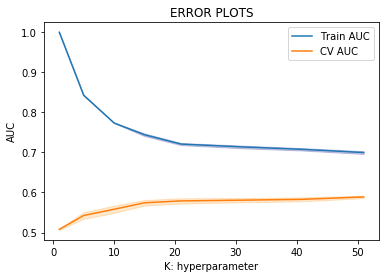

In [143]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()
parameters = {'n_neighbors':[1, 5, 10, 15, 21, 23, 26, 31]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc')
clf.fit(X_train_tfidf_w2v_vectors, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(K,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [144]:
print(clf.best_score_)
print(clf.best_estimator_)
print(clf.best_params_)
best_k = clf.best_params_['n_neighbors']

0.588921915855745
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')
{'n_neighbors': 31}


# 2. Testing with Test data

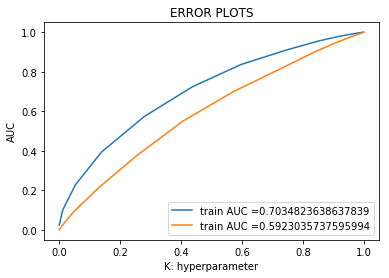

Train confusion matrix
[[    1  3384]
 [    1 19059]]
Test confusion matrix
[[    0  2605]
 [    0 13895]]


In [145]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(X_train_tfidf_w2v_vectors, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = []
for i in range(0, X_train_avg_w2v.shape[0], 1000):
    y_train_pred.extend(neigh.predict_proba(X_train_tfidf_w2v_vectors[i:i+1000])[:,1])
#y_cv_pred =  neigh.predict_proba(X_cv_bow)[:,1]
y_test_pred = []
for i in range(0, X_test_avg_w2v.shape[0], 1000):
        y_test_pred.extend(neigh.predict_proba(X_test_tfidf_w2v_vectors[i:i+1000])[:,1])

#train_fpr, train_tpr, thresholds = roc_curve(y_train, neigh.predict_proba(X_train_bow)[:,1])
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_pred)
#test_fpr, test_tpr, thresholds = roc_curve(y_test, neigh.predict_proba(X_test_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,  y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, neigh.predict(X_train_tfidf_w2v_vectors)))
print("Test confusion matrix")
print(confusion_matrix(y_test, neigh.predict(X_test_tfidf_w2v_vectors)))

Train confusion matrix


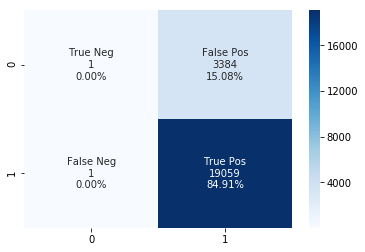

In [146]:
train_conf_matrix_tfidf_w2v_vectors=confusion_matrix(y_train, neigh.predict(X_train_tfidf_w2v_vectors))
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                train_conf_matrix_tfidf_w2v_vectors.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     train_conf_matrix_tfidf_w2v_vectors.flatten()/np.sum(train_conf_matrix_tfidf_w2v_vectors)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
sns.heatmap(train_conf_matrix_tfidf_w2v_vectors, annot=labels, fmt='', cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Train confusion matrix');

Test confusion matrix


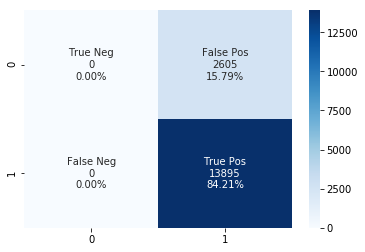

In [147]:
test_conf_matrix_tfidf_w2v_vectors=confusion_matrix(y_test, neigh.predict(X_test_tfidf_w2v_vectors))
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                test_conf_matrix_tfidf_w2v_vectors.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     test_conf_matrix_tfidf_w2v_vectors.flatten()/np.sum(test_conf_matrix_tfidf_w2v_vectors)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print("Test confusion matrix")
sns.heatmap(test_conf_matrix_tfidf_w2v_vectors, annot=labels, fmt='', cmap='Blues');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Test confusion matrix');

In [ ]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr (False Positive Rate)
def predict(proba, threshold, fpr, tpr):
    
    t = threshold[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions